In [2]:
import pandas
import sklearn
import seaborn
from matplotlib import pyplot as plot
%matplotlib inline
seaborn.set()

In [3]:
dataset = pandas.read_csv('train.csv')

In [4]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McGowan, Miss. Anna ""Annie""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
survived = dataset[dataset['Survived'] == 1]

not_survived = dataset[dataset['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(dataset)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(dataset)*100.0))
print ("Total: %i"%len(dataset))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [8]:
dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
dataset.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [10]:
dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


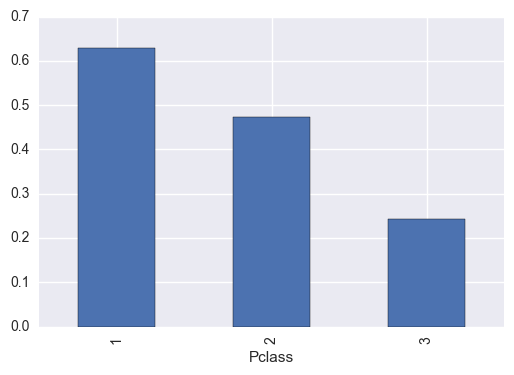

In [11]:
dataset.groupby('Pclass').Survived.mean().plot(kind='bar')

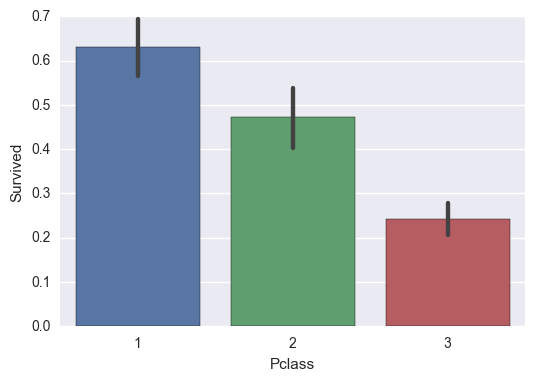

In [12]:
seaborn.barplot(x='Pclass', y='Survived', data=dataset)

In [13]:
dataset.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
dataset.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [15]:
dataset[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


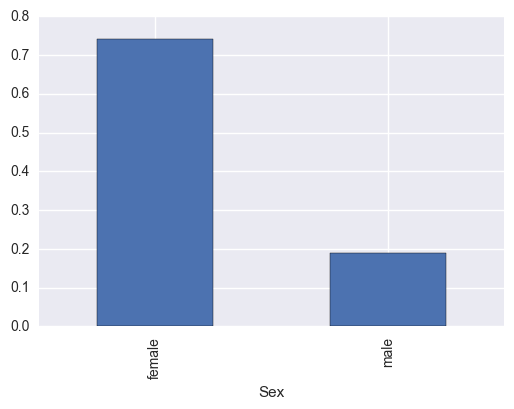

In [16]:
dataset.groupby('Sex').Survived.mean().plot(kind='bar')

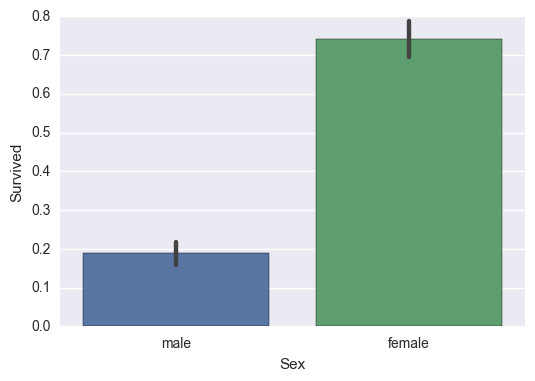

In [17]:
seaborn.barplot(x='Sex', y='Survived', data=dataset)

In [18]:
tab = pandas.crosstab(dataset['Pclass'], dataset['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


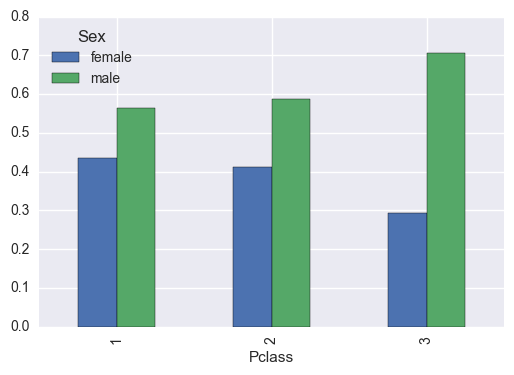

In [19]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)

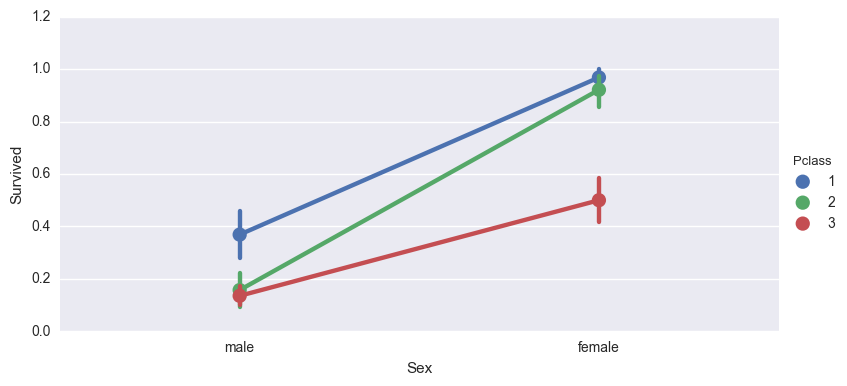

In [20]:
seaborn.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=dataset)

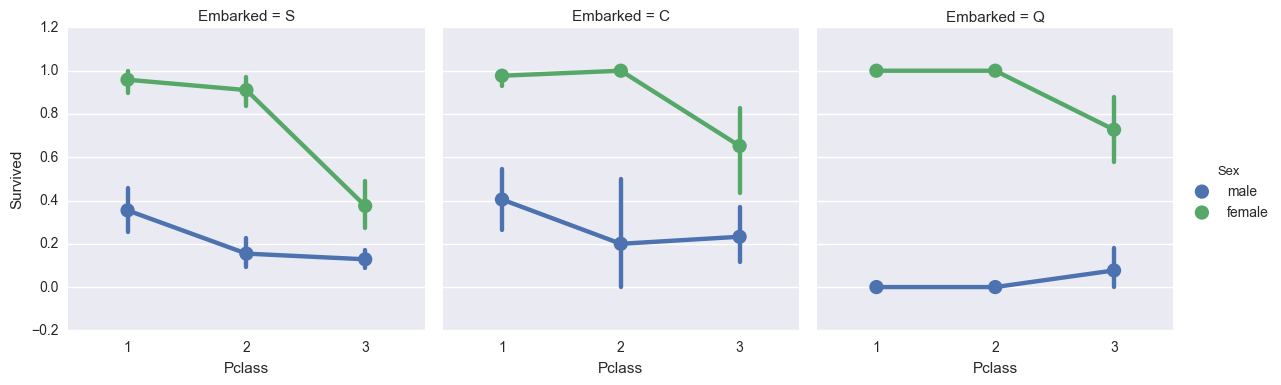

In [21]:
seaborn.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=dataset)

In [22]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
dataset.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [24]:
dataset[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


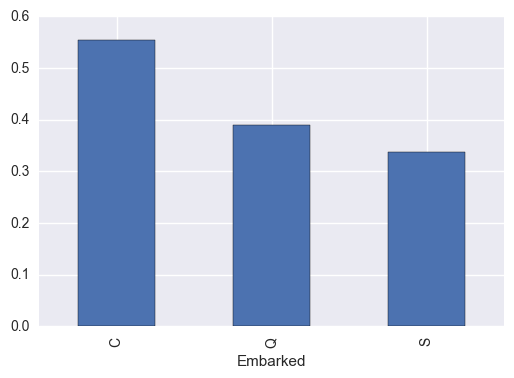

In [25]:
dataset.groupby('Embarked').Survived.mean().plot(kind='bar')

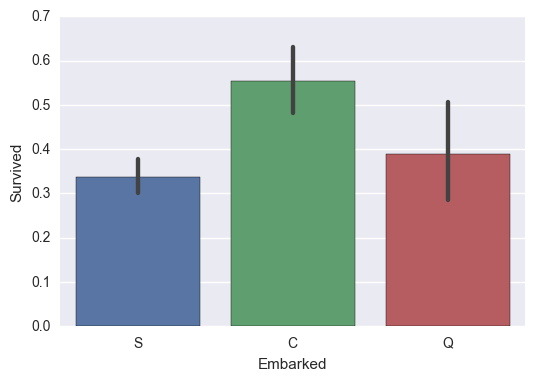

In [26]:
seaborn.barplot(x='Embarked', y='Survived', data=dataset)

In [27]:
dataset['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
dataset.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [29]:
dataset[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


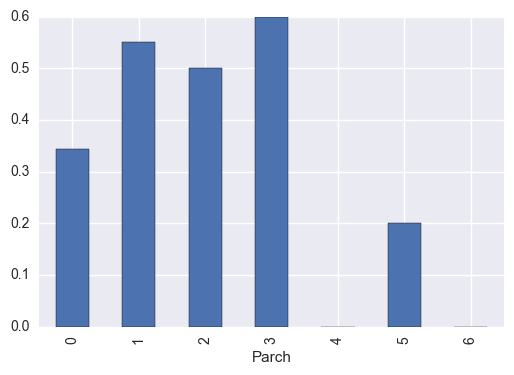

In [30]:
dataset.groupby('Parch').Survived.mean().plot(kind='bar')

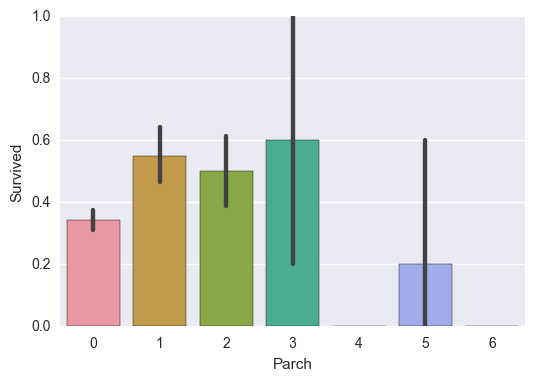

In [31]:
seaborn.barplot(x='Parch', y='Survived', data=dataset)

In [32]:
dataset['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [33]:
dataset.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [34]:
dataset[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


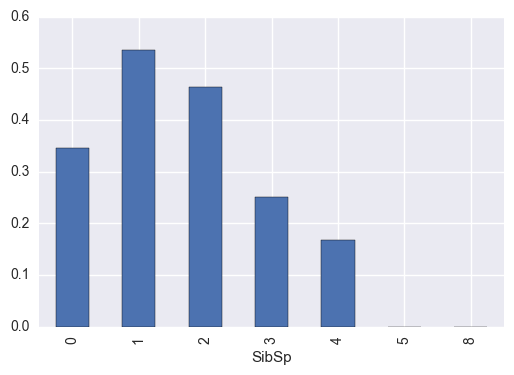

In [35]:
dataset.groupby('SibSp').Survived.mean().plot(kind='bar')

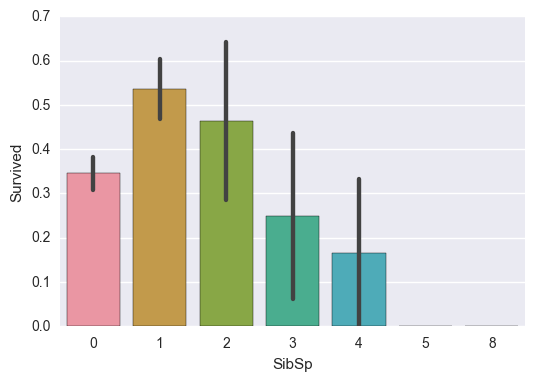

In [36]:
seaborn.barplot(x='SibSp', y='Survived', data=dataset)

In [37]:
dataset['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, dtype: int64

In [38]:
dataset.groupby('Age').Survived.value_counts()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
1.00   1           5
       0           2
2.00   0           7
       1           3
3.00   1           5
       0           1
4.00   1           7
       0           3
5.00   1           4
6.00   1           2
       0           1
7.00   0           2
       1           1
8.00   0           2
       1           2
9.00   0           6
       1           2
10.00  0           2
11.00  0           3
       1           1
12.00  1           1
13.00  1           2
14.00  0           3
       1           3
14.50  0           1
                  ..
51.00  0           5
       1           2
52.00  0           3
       1           3
53.00  1           1
54.00  0           5
       1           3
55.00  0           1
       1           1
55.50  0           1
56.00  0           2
       1           2
57.00  0           2
58.00  1           3
       0           2
59.00  0          

In [39]:
dataset[['Age', 'Survived']].groupby(['Age'], as_index=False).head().mean()

Age         32.282596
Survived     0.397476
dtype: float64

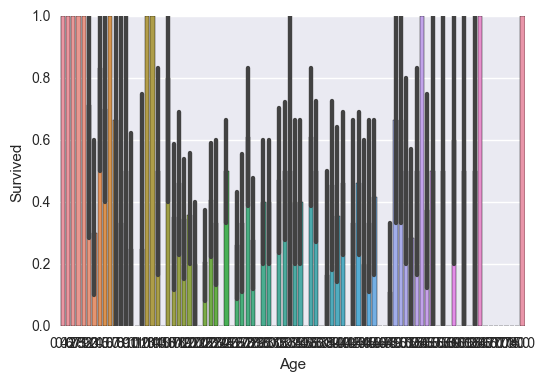

In [40]:
seaborn.barplot(x='Age', y='Survived', data=dataset)

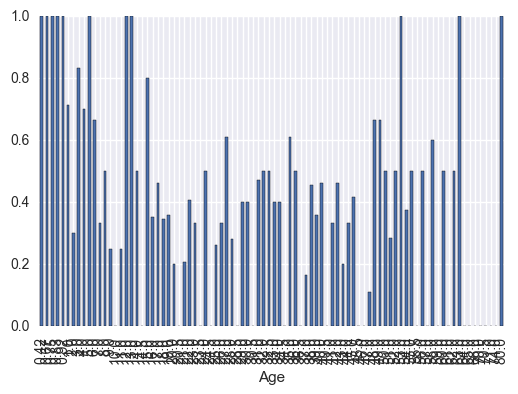

In [41]:
dataset.groupby('Age').Survived.mean().plot(kind='bar')

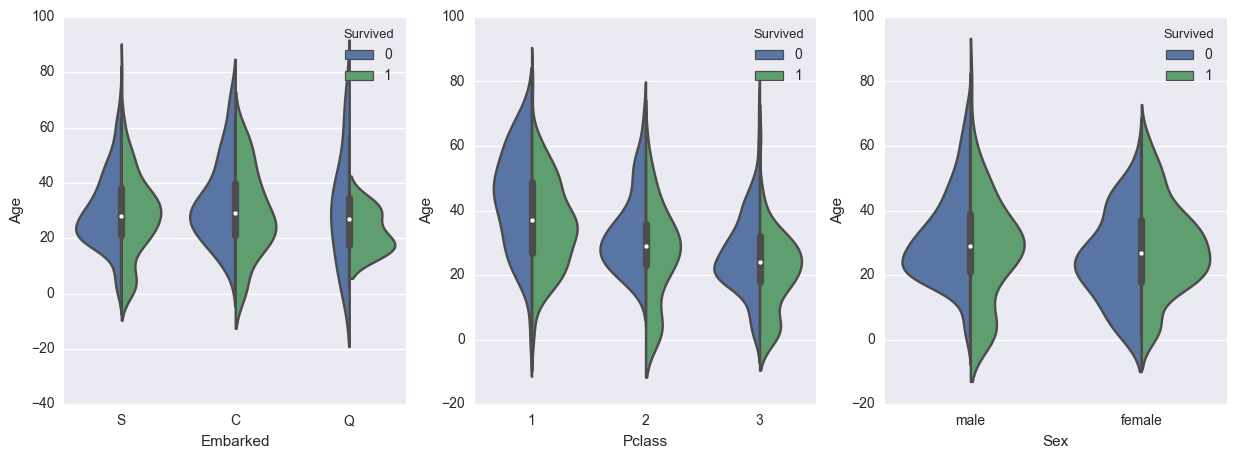

In [42]:
figure = plot.figure(figsize=(15, 5))

ax1 = figure.add_subplot(131)
ax2 = figure.add_subplot(132)
ax3 = figure.add_subplot(133)

seaborn.violinplot(x="Embarked", y="Age", hue="Survived", data=dataset, split=True, ax=ax1)
seaborn.violinplot(x="Pclass", y="Age", hue="Survived", data=dataset, split=True, ax=ax2)
seaborn.violinplot(x="Sex", y="Age", hue="Survived", data=dataset, split=True, ax=ax3)

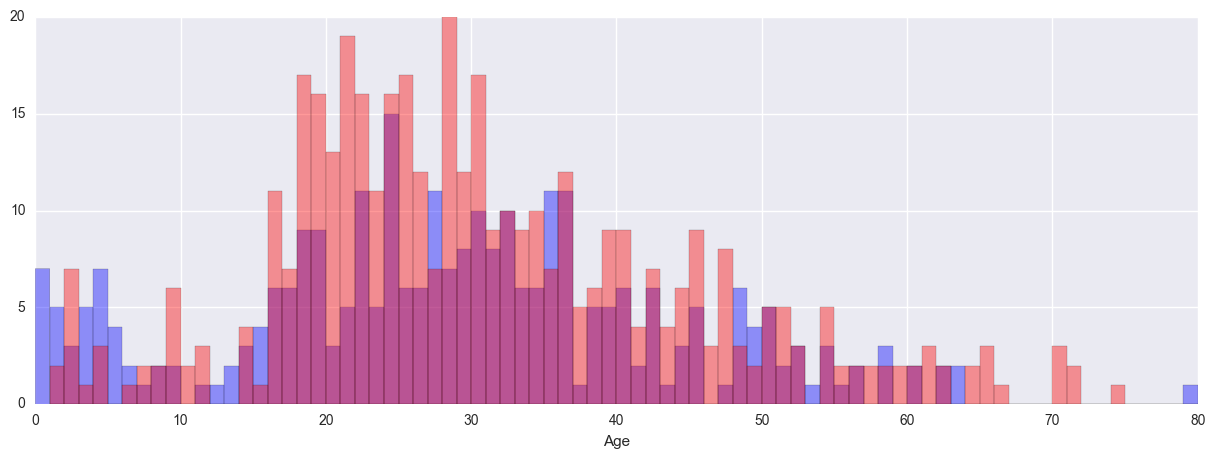

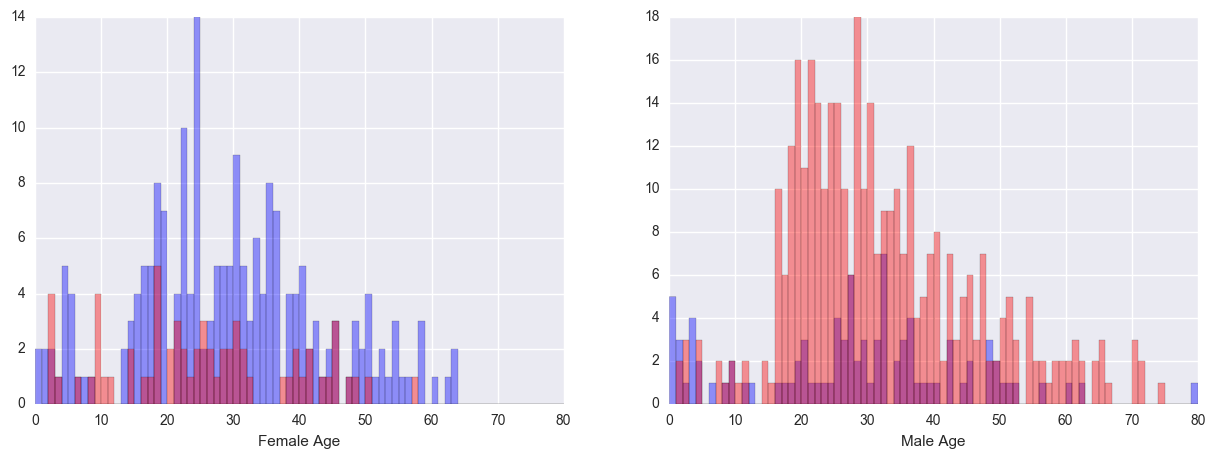

In [43]:
total_survived = dataset[dataset['Survived']==1]
total_not_survived = dataset[dataset['Survived']==0]
male_survived = dataset[(dataset['Survived']==1) & (dataset['Sex']=="male")]
female_survived = dataset[(dataset['Survived']==1) & (dataset['Sex']=="female")]
male_not_survived = dataset[(dataset['Survived']==0) & (dataset['Sex']=="male")]
female_not_survived = dataset[(dataset['Survived']==0) & (dataset['Sex']=="female")]

plot.figure(figsize=[15,5])
plot.subplot(111)
seaborn.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
seaborn.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

plot.figure(figsize=[15,5])

plot.subplot(121)
seaborn.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
seaborn.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plot.subplot(122)
seaborn.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
seaborn.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Male Age')

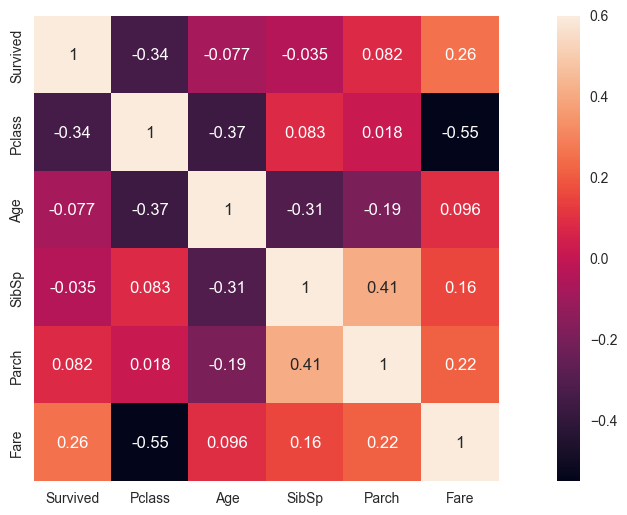

In [44]:
plot.figure(figsize=(15, 6))
seaborn.heatmap(dataset.drop('PassengerId', 1).corr(), vmax=0.6, square=True, annot=True)

In [45]:
testing_dataset, training_dataset = pandas.read_csv('test.csv'),pandas.read_csv('train.csv')

In [46]:
main_dataset = [testing_dataset, training_dataset]

In [47]:
#Name Feature

for data_entry in main_dataset:
        data_entry['Title'] = data_entry.Name.str.extract(' ([A-Za-z]+)\.')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [48]:
testing_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [49]:
training_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [50]:
pandas.crosstab(training_dataset['Sex'], training_dataset['Title'])

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [51]:
for dataset in main_dataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
training_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [52]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dat in main_dataset:
    dat["Title"] = dat['Title'].map(title_mapping)
    dat['Title'] = dat['Title'].fillna(0)

In [53]:
training_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [54]:
for dat in main_dataset:
    dat['Embarked'] = dat['Embarked'].fillna('S')
    dat['Embarked'] = dat['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

training_dataset = training_dataset.drop('Name', axis=1)

In [55]:
training_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,1
